<a href="https://colab.research.google.com/github/q-rai/VisWorkshop/blob/main/2024_SimBuild_Vis_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Picture is Worth a Thousand Data Points: Introduction to Visualization
## by Andy Berres

This notebook is intended for the hands-on portion of my workshop "A Picture is Worth a Thousand Data Points: Introduction to Visualization" at Tapia 2023.

### QR Code for the [Github Repository](https://github.com/q-rai/VisWorkshop/)


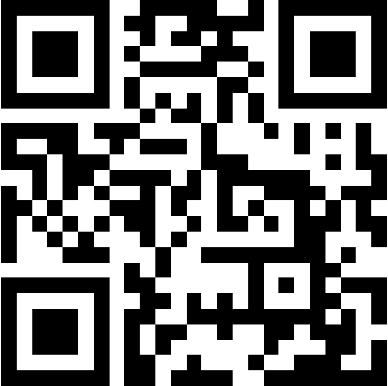


## Setup

Make local installs and download some needed files

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

!curl -s -o setup.sh https://raw.githubusercontent.com/q-rai/VisWorkshop/main/setup.sh
!bash setup.sh

Fetching needed files ..
Done


## Raw Data
Let's see what the data looks like

### Reading CSV Data in Python/Pandas
Pandas makes this very easy. The file `Data/table.csv` was downloaded by the setup script above.

In [ ]:
# read data and put it in a dataframe
df = pd.read_csv('Data/table.csv')
print(df)

          x        y
0   40.0000  99.8590
1   50.0000  99.8590
2   61.2821  91.3974
3   69.2308  79.0897
4   76.4103  59.8590
5   75.1282  43.3205
6   70.5128  26.0128
7   60.5128  13.3205
8   50.0000   8.7051
9   37.4359   6.3974
10  28.7179  14.8590
11  22.0513  26.3974
12  16.4103  47.9359
13  16.6667  64.8590
14  19.7436  80.2436
15  28.4615  92.1667
16  31.7949  69.8590
17  54.3590  70.6282
18  29.2308  49.8590
19  31.5385  41.7821
20  33.8462  35.2436
21  40.2564  28.7051
22  49.2308  28.7051
23  57.4359  35.2436
24  59.4872  45.6282
25  53.3333  31.7821
26  44.8718  28.3205
27  60.2564  52.5513
28  17.9487  36.3974
29  44.1026   6.3974
30  72.8205  71.0128


### Simple Statistics

I wonder if the statistical properties are of any use...
Pandas has the `DataFrame.describe()` function which provides various statistical properties.

In [ ]:
df.describe()

,x,y
count,31.000000,31.000000
mean,45.260555,47.948303
std,18.367979,27.907733
min,16.410300,6.397400
25%,30.384650,28.512800
50%,44.871800,43.320500
75%,59.871800,70.243600
max,76.410300,99.859000


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['x'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['y'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_2, *['x'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_3, *['y'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_4, *[[['x', 'y']]], **{})
chart

That wasn't very helpful either. Looking at the numbers, I still have no idea what this could be. So let's try plotting it.

### Simple Plots in Pandas
Pandas has some handy plotting functions.

<Axes: >

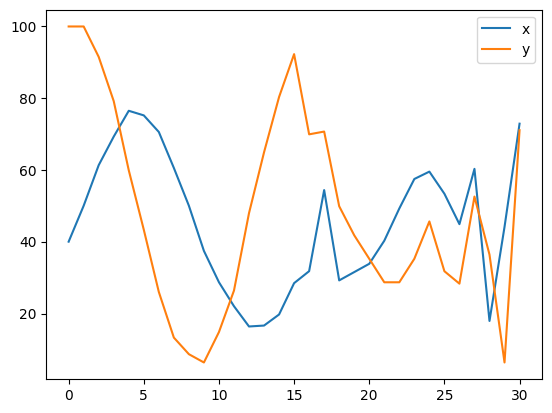

In [ ]:
df.plot()

Well, that wasn't very helpful. Let's try to be more specific.

### Scatter Plots in Pandas
Pandas lets you specify plot types. You can find all the supported plot types in their [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html). Under the hood, it's all `matplotlib` so you can use the `matplotlib` settings to modify your plot.

<Axes: xlabel='x', ylabel='y'>

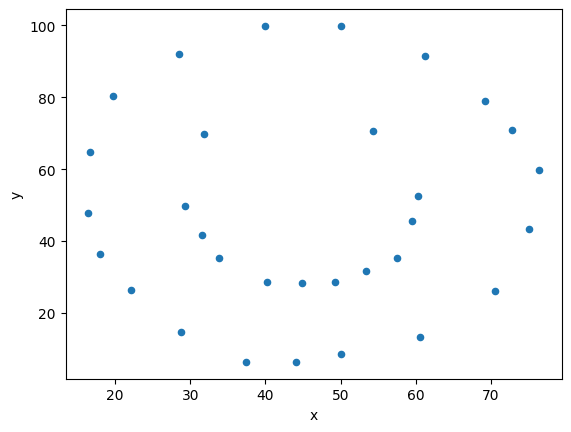

In [ ]:
df.plot(x='x', y='y', kind='scatter')

Much better, isn't it?

### Let's look at some more interesting data
We'll be using Seaborn. It's based on Matplotlib, and it makes plotting easy (especially for pandas dataframes).
Seaborn brings a bunch of test datasets you can play with. You can get a full list using `sns.get_dataset_names()`.

In [ ]:
cars = sns.load_dataset('mpg')
print(cars)

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chevelle malibu  
1            70     usa      

#### Simple scatter plot

<Axes: xlabel='horsepower', ylabel='mpg'>

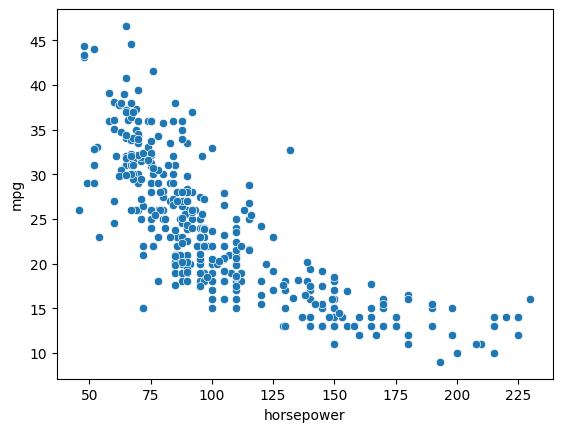

In [ ]:
sns.scatterplot(data=cars, x='horsepower', y='mpg')

### Change some colors

#### By origin
Origin is a discrete category, so we're using a categorical colormap. Seaborn will do this for you automatically.

<Axes: xlabel='horsepower', ylabel='mpg'>

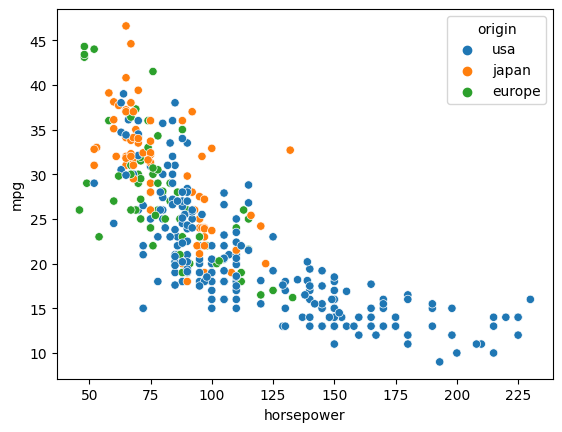

In [ ]:
sns.scatterplot(data=cars, x='horsepower', y='mpg', hue='origin')


#### By model year


<Axes: xlabel='horsepower', ylabel='mpg'>

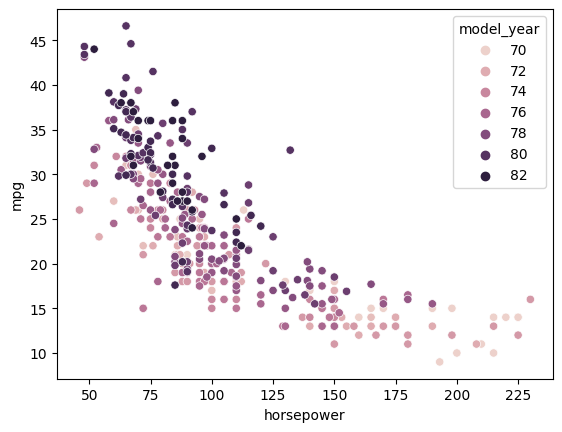

In [ ]:
sns.scatterplot(data=cars, x='horsepower', y='mpg', hue='model_year')


#### Try a different colormap

Seaborn has different colormap (or color palette) options. You can see them here: https://seaborn.pydata.org/tutorial/color_palettes.html

<Axes: xlabel='horsepower', ylabel='mpg'>

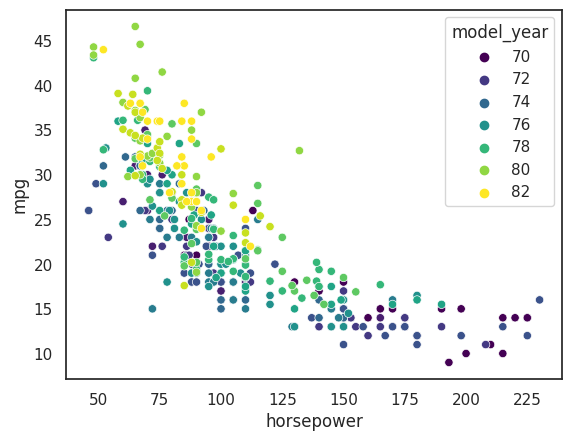

In [ ]:
sns.set(style='white')
sns.scatterplot(data=cars, x='horsepower', y='mpg', hue='model_year', palette='viridis')

#### Change background
Options include `white` (blank background), `dark`, `whitegrid`, and `darkgrid`. Go ahead and try these out to see which one you like best.

<Axes: xlabel='horsepower', ylabel='mpg'>

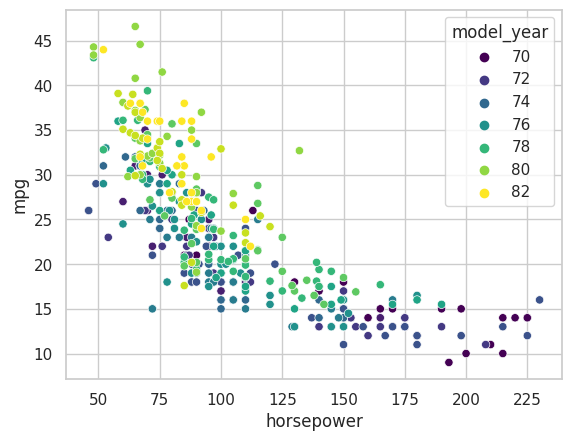

In [ ]:
sns.set(style='whitegrid')
sns.scatterplot(data=cars, x='horsepower', y='mpg', hue='model_year', palette='viridis')

#### Change marker sizes

If you have a multidimensional dataset, marker size is another way to get more information about your data into the same plot. This variable should be numerical.

<Axes: xlabel='horsepower', ylabel='mpg'>

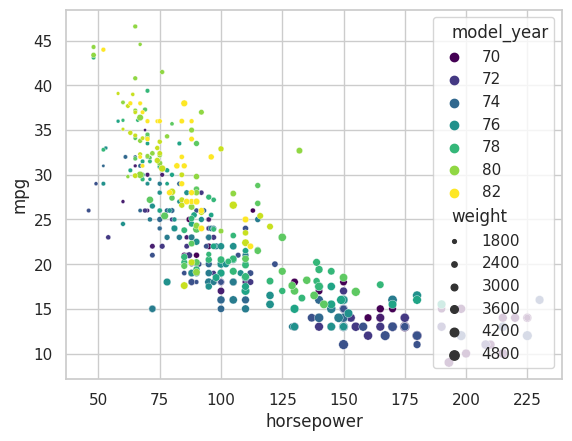

In [ ]:
sns.scatterplot(data=cars, x='horsepower', y='mpg', hue='model_year', palette='viridis', size='weight', sizes=(5,50))

#### The legend is blocking my view!
You can move it around fairly easily.

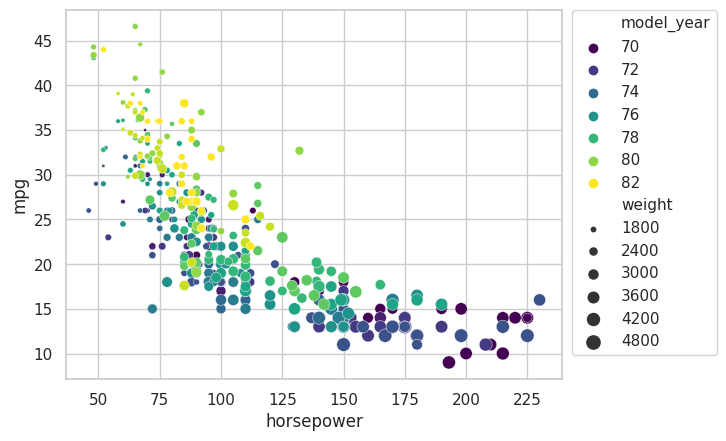

In [ ]:
sns.scatterplot(data=cars, x='horsepower', y='mpg', hue='model_year', palette='viridis', size='weight', sizes=(5,100))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


#### Split by different variables
You can also make the same plot multiple times for different categorical values. Let's make one scatterplot per region of origin.
One important thing to know about `relplot` is that the x-axis and y-axis will be identical for all plots it makes, to make them comparable.

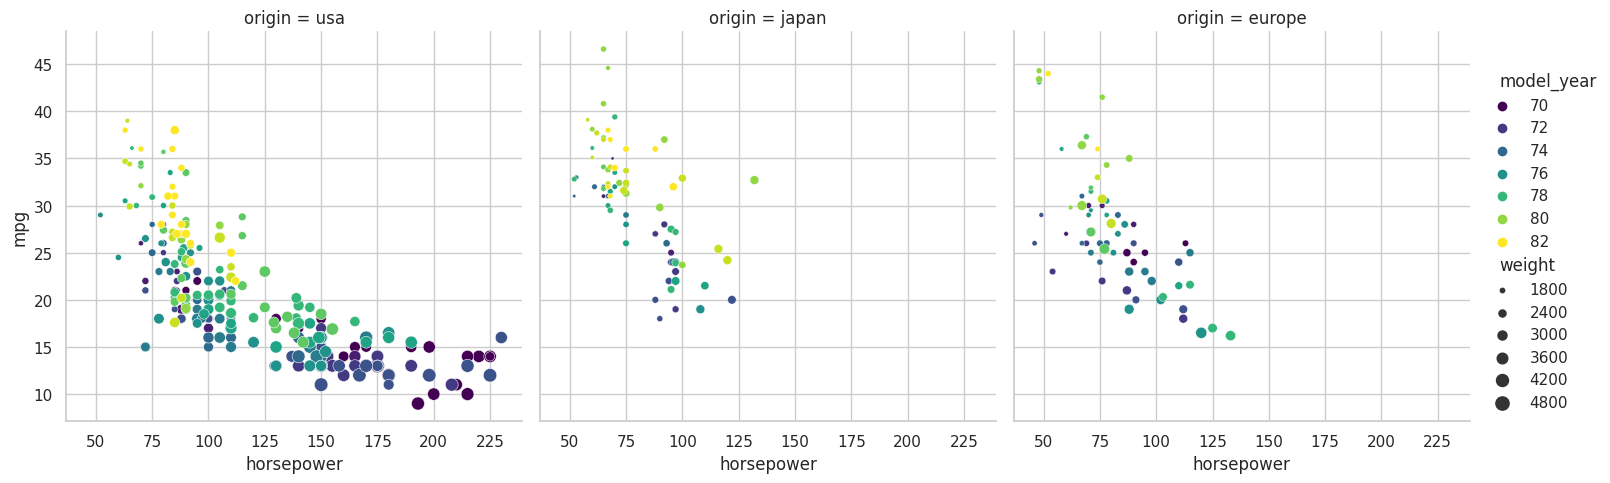

In [ ]:
sns.relplot(data=cars, x='horsepower', y='mpg', hue='model_year', palette='viridis', size='weight', sizes=(5,100), col='origin')


### Plotting options

Depending on what you use your plot for (`paper`, `talk`, `poster`), you may want different label sizes to keep everything legible. For more styling options: https://seaborn.pydata.org/tutorial/aesthetics.html

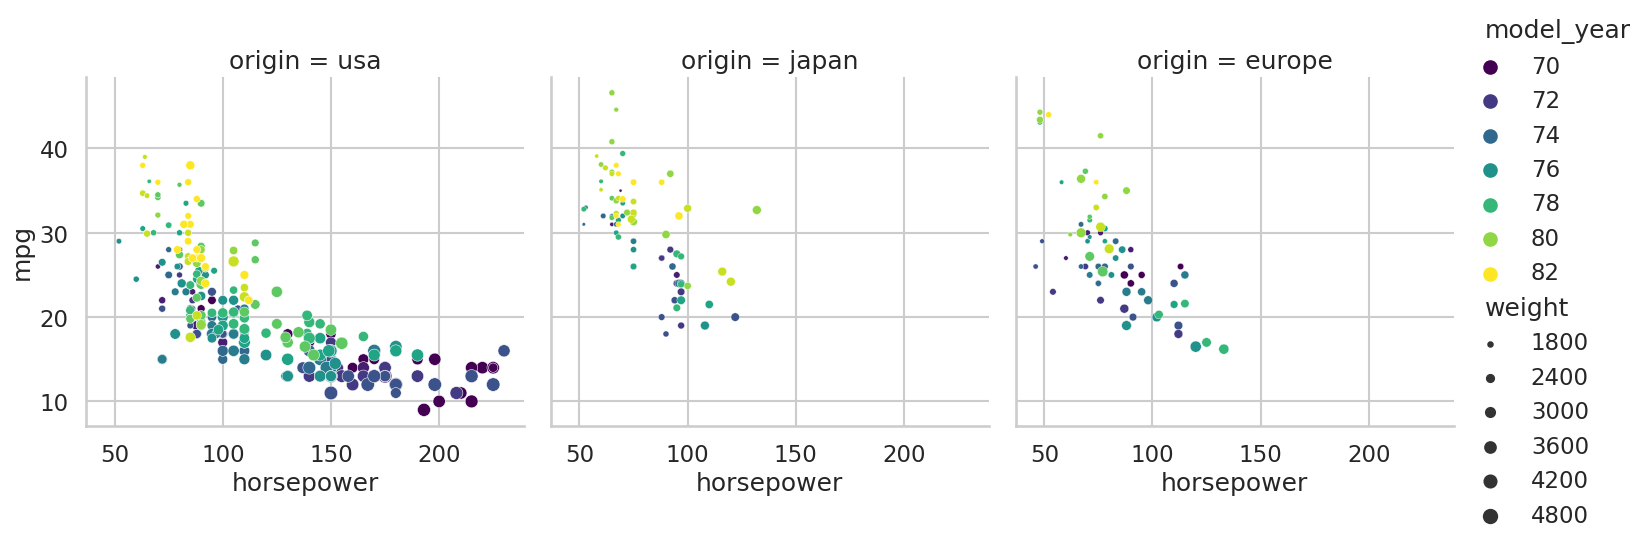

In [ ]:
sns.set_context("talk")
sns.relplot(data=cars, x='horsepower', y='mpg', hue='model_year', palette='viridis', size='weight', sizes=(5,100), col='origin')


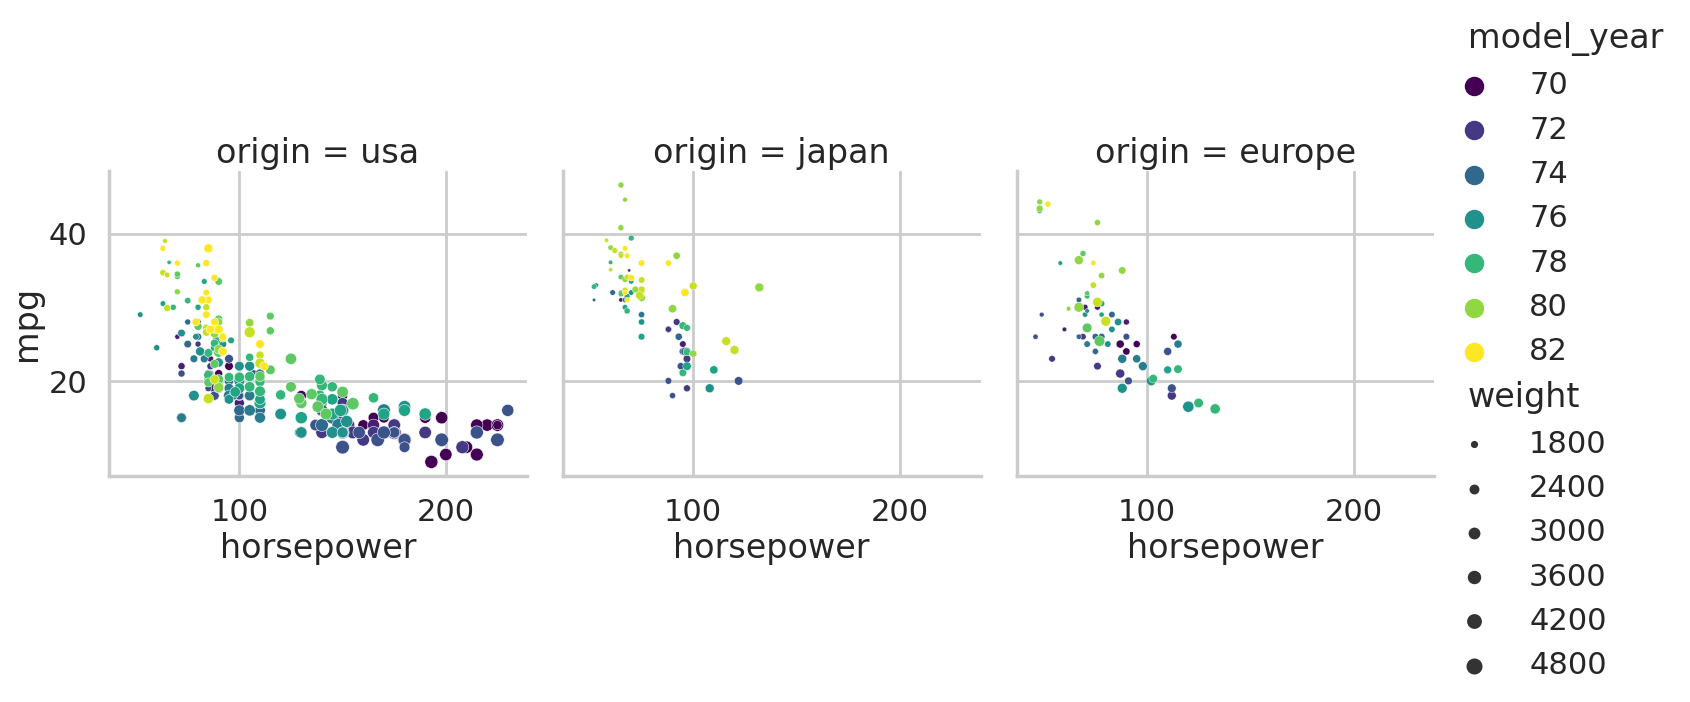

In [ ]:
sns.set_context("poster")
sns.relplot(data=cars, x='horsepower', y='mpg', hue='model_year', palette='viridis', size='weight', sizes=(5,100), col='origin')


## More visualization
Seaborn alone has many more plot types. Check out their example gallery here: https://seaborn.pydata.org/examples/index.html